# embedding

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import torch
from plantclef.config import get_device

print(f"PyTorch Version: {torch.__version__}")
device = get_device()
print(f"Using device: {device}")

PyTorch Version: 2.6.0
Using device: cpu


In [ ]:
import pandas as pd
from pathlib import Path

# Get list of stored filed in cloud bucket
root = Path().resolve().parents[0]
print(root)
! date

/Users/mgustineli/github/pytorch-plantclef
Sat Mar 15 22:53:20 EDT 2025


In [3]:
# path to data
data_path = f"{root}/data/subset_top5_train"

# read train data
train_df = pd.read_parquet(data_path)
# schema
print(train_df.shape)
train_df.head(3)

(3760, 22)


,species_id,image_name,path,data,organ,obs_id,license,partner,author,altitude,...,gbif_species_id,species,genus,family,dataset,publisher,references,url,learn_tag,image_backup_url
0,1360257,5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg,/PlantCLEF2024/train/1360257/5a4deafc321f2b653...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bark,1015292920,cc-by-sa,None,Gabor Graehn,NaN,...,3039454.0,Frangula alnus Mill.,Frangula,Rhamnaceae,plantnet,plantnet,https://identify.plantnet.org/fr/k-southwester...,https://bs.plantnet.org/image/o/5a4deafc321f2b...,train,https://lab.plantnet.org/LifeCLEF/PlantCLEF202...
1,1360257,a6d9a13ec26cbb04d61861ad5cb4ede8eb4d1ea3.jpg,/PlantCLEF2024/train/1360257/a6d9a13ec26cbb04d...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bark,1005087257,cc-by-sa,None,Jacco Sanders,51.0,...,3039454.0,Frangula alnus Mill.,Frangula,Rhamnaceae,plantnet,plantnet,https://identify.plantnet.org/fr/k-southwester...,https://bs.plantnet.org/image/o/a6d9a13ec26cbb...,train,https://lab.plantnet.org/LifeCLEF/PlantCLEF202...
2,1360257,0fec55fc5105e512df08490ecbb55df3393d85c8.jpg,/PlantCLEF2024/train/1360257/0fec55fc5105e512d...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,leaf,4111721487,http://creativecommons.org/licenses/by-nc/4.0/,None,imrsmf,NaN,...,3039454.0,Frangula alnus Mill.,Frangula,Rhamnaceae,gbif,iNaturalist,https://www.inaturalist.org/photos/268971946,https://inaturalist-open-data.s3.amazonaws.com...,train,https://lab.plantnet.org/LifeCLEF/PlantCLEF202...


### looking at some images

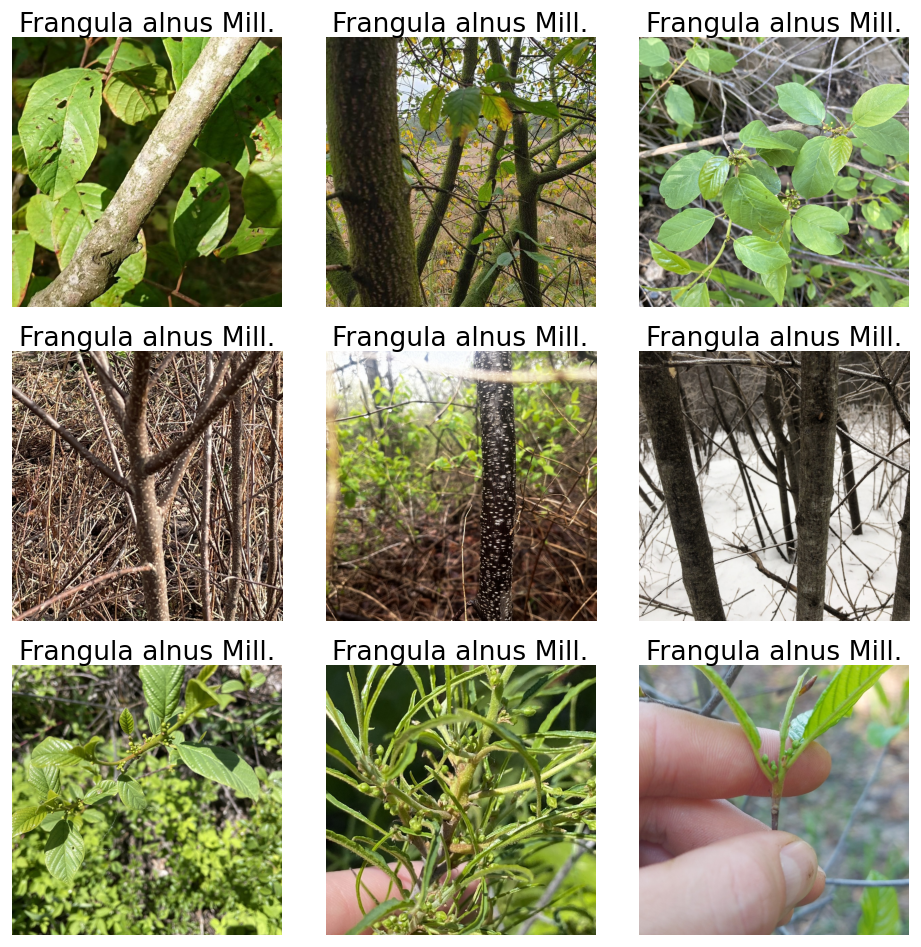

In [7]:
from plantclef.plotting import plot_images_from_binary


plot_images_from_binary(
    train_df,
    data_col="data",
    label_col="species",
    grid_size=(3, 3),
    crop_square=True,
    figsize=(8, 8),
    dpi=120,
)

### extract embeddings from images

In [4]:
# limit to 5 samples for testing
limit_df = train_df.head(2)
print(f"Limit DF shape: {limit_df.shape}")

Limit DF shape: (2, 22)


In [5]:
from plantclef.embed.transform import extract_embeddings

# extract embeddings
embeddings = extract_embeddings(limit_df)

Extracting embeddings: 100%|██████████| 1/1 [00:10<00:00, 10.87s/batch]


In [6]:
# embeddings shape
embeddings.shape

(2, 768)

In [10]:
# create embeddings dataframe
cols = ["image_name", "species", "species_id"]
embeddings_df = limit_df[cols].copy()
embeddings_df["embeddings"] = embeddings.tolist()
embeddings_df.head(2)

,image_name,species,species_id,embeddings
0,5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg,Frangula alnus Mill.,1360257,"[-0.8239141702651978, 1.2448816299438477, 0.02..."
1,a6d9a13ec26cbb04d61861ad5cb4ede8eb4d1ea3.jpg,Frangula alnus Mill.,1360257,"[-0.14528469741344452, -0.8409067988395691, -0..."


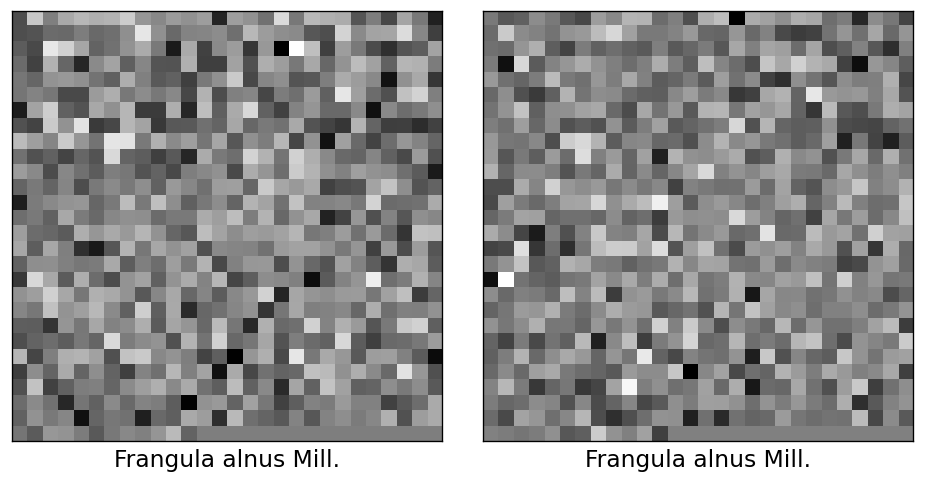

In [12]:
from plantclef.plotting import plot_images_from_embeddings

plot_images_from_embeddings(
    embeddings_df,
    data_col="embeddings",
    label_col="species",
    grid_size=(1, 2),
    figsize=(8, 4),
    dpi=120,
)